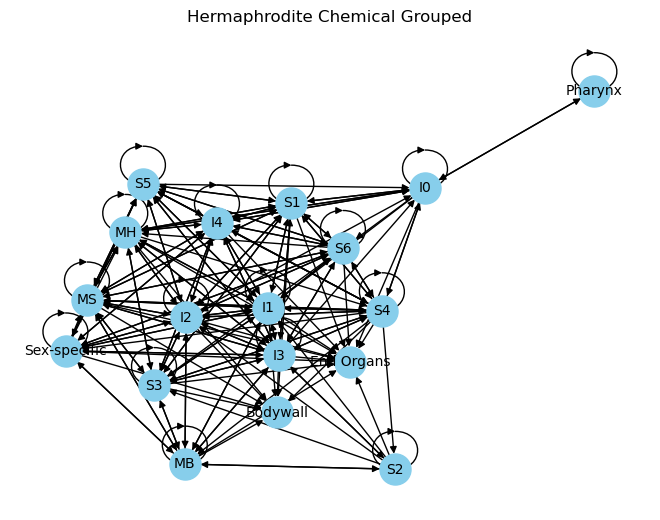

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = r'D:\Complex Systems Project\Data Sets\FILTERED DATA\Herm_Full_Chemical_Grp.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header=0, index_col=0)

G = nx.DiGraph()
for source in df.index:
    for target in df.columns:
        if df.loc[source, target] == 1:
            G.add_edge(source, target)

pos = nx.kamada_kawai_layout(G) 
node_labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
plt.title('Hermaphrodite Chemical Grouped')
plt.show()

In [3]:
#Degree of each node in the given network

degrees = dict(G.degree())
for node, degree in degrees.items():
    print(f"Node {node}: Degree {degree}")

Node Pharynx: Degree 4
Node I0: Degree 18
Node S6: Degree 24
Node S5: Degree 21
Node S4: Degree 28
Node S1: Degree 26
Node I4: Degree 27
Node I3: Degree 31
Node I2: Degree 30
Node I1: Degree 30
Node MH: Degree 23
Node MS: Degree 27
Node End Organs: Degree 14
Node Sex-specific: Degree 21
Node S3: Degree 24
Node S2: Degree 11
Node MB: Degree 19
Node Bodywall: Degree 10


In [4]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

for node in G.nodes():
    print(f"Node {node}: In-Degree = {in_degrees[node]}, Out-Degree = {out_degrees[node]}")

Node Pharynx: In-Degree = 2, Out-Degree = 2
Node I0: In-Degree = 9, Out-Degree = 9
Node S6: In-Degree = 12, Out-Degree = 12
Node S5: In-Degree = 10, Out-Degree = 11
Node S4: In-Degree = 12, Out-Degree = 16
Node S1: In-Degree = 12, Out-Degree = 14
Node I4: In-Degree = 13, Out-Degree = 14
Node I3: In-Degree = 14, Out-Degree = 17
Node I2: In-Degree = 14, Out-Degree = 16
Node I1: In-Degree = 15, Out-Degree = 15
Node MH: In-Degree = 11, Out-Degree = 12
Node MS: In-Degree = 13, Out-Degree = 14
Node End Organs: In-Degree = 14, Out-Degree = 0
Node Sex-specific: In-Degree = 9, Out-Degree = 12
Node S3: In-Degree = 11, Out-Degree = 13
Node S2: In-Degree = 4, Out-Degree = 7
Node MB: In-Degree = 9, Out-Degree = 10
Node Bodywall: In-Degree = 10, Out-Degree = 0


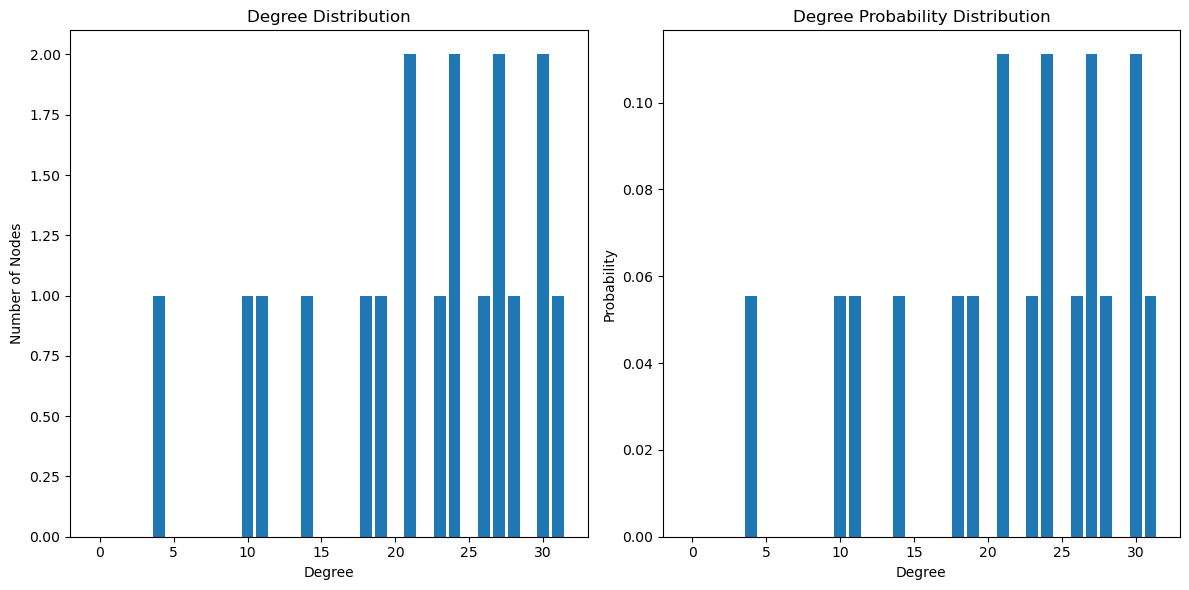

Hubs (Nodes with Degree >= 25): ['S4', 'S1', 'I4', 'I3', 'I2', 'I1', 'MS']


In [5]:
degree_sequence = [d for n, d in G.degree()]
degree_count = nx.degree_histogram(G)

# Calculate the probability of each degree
total_nodes = len(G.nodes())
degree_probability = [count / total_nodes for count in degree_count]

# Plot the degree distribution (number of nodes vs. degree)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(len(degree_count)), degree_count, width=0.8, align='center')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')

# Plot the degree distribution (probability of each degree vs. degree)
plt.subplot(122)
plt.bar(range(len(degree_probability)), degree_probability, width=0.8, align='center')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Probability Distribution')

plt.tight_layout()
plt.show()

# Identify hubs (nodes with high degree)
threshold_degree = 25  # Set a threshold degree value to identify hubs
hubs = [node for node, degree in G.degree() if degree >= threshold_degree]
print(f'Hubs (Nodes with Degree >= {threshold_degree}): {hubs}')


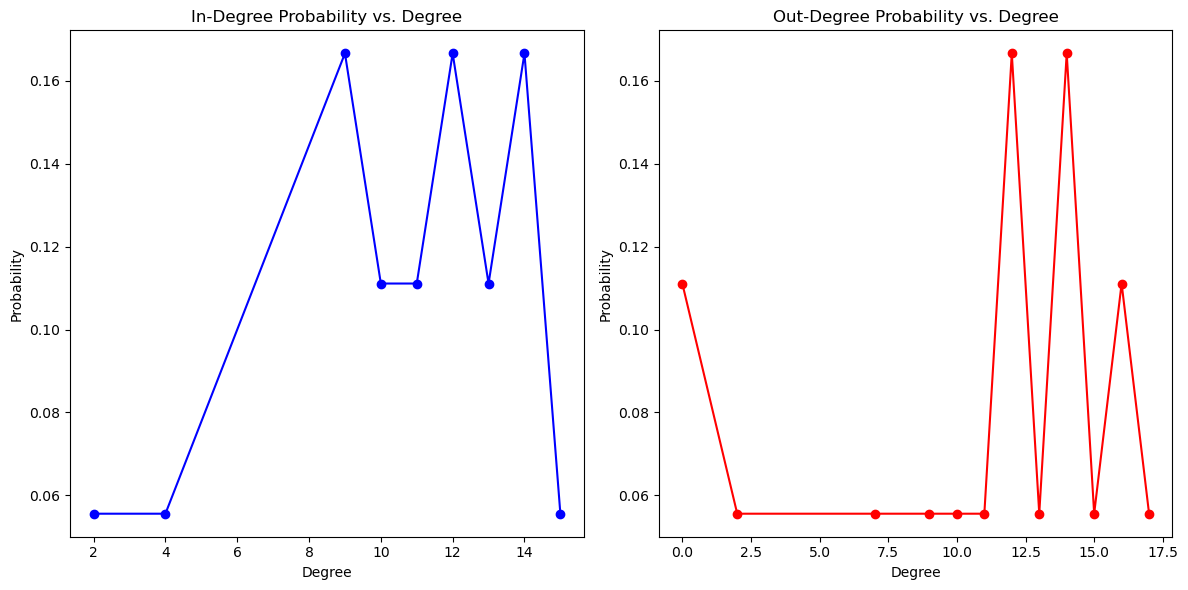

In [6]:
from collections import Counter

in_degree_sequence = [d for n, d in G.in_degree()]
out_degree_sequence = [d for n, d in G.out_degree()]

# Get unique degrees and their counts
unique_in_degrees, in_degree_counts = zip(*sorted(Counter(in_degree_sequence).items()))
unique_out_degrees, out_degree_counts = zip(*sorted(Counter(out_degree_sequence).items()))

total_nodes = len(G.nodes())
in_degree_prob = [count / total_nodes for count in in_degree_counts]
out_degree_prob = [count / total_nodes for count in out_degree_counts]

# Plot in-degree probability vs. degree
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(unique_in_degrees, in_degree_prob, marker='o', linestyle='-', color='blue')
plt.title("In-Degree Probability vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Probability")

# Plot out-degree probability vs. degree
plt.subplot(1, 2, 2)
plt.plot(unique_out_degrees, out_degree_prob, marker='o', linestyle='-', color='red')
plt.title("Out-Degree Probability vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

### Community Detection Algorithm

Community 0: {'Pharynx'}
Community 1: {'MH', 'MS', 'S6', 'I2', 'I1', 'Sex-specific', 'I3', 'End Organs', 'S4', 'S3', 'S1', 'I0', 'I4'}
Community 2: {'S5'}
Community 3: {'S2'}
Community 4: {'MB'}
Community 5: {'Bodywall'}


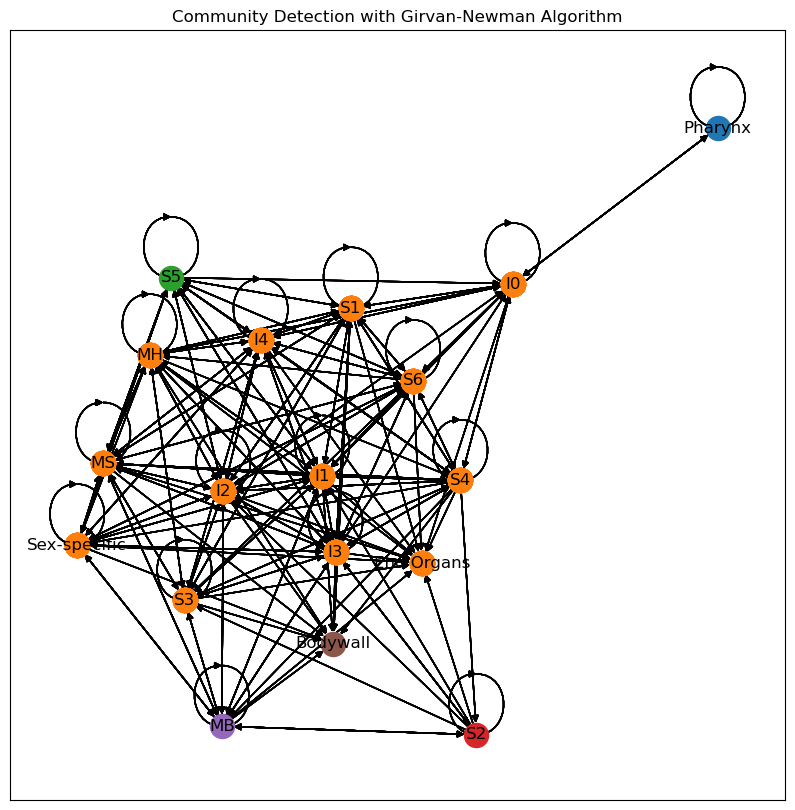

In [9]:
from networkx.algorithms.community import girvan_newman
import itertools

# Apply the Girvan-Newman algorithm for community detection
comp = girvan_newman(G)

# Get the top-level communities after a certain number of splits (e.g., 2)
k = 5
top_level_communities = next(itertools.islice(comp, k-1, k))

for i, community_set in enumerate(top_level_communities):
    print(f"Community {i}: {community_set}")

# Visualize the communities with different colors and labels
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)

for i, community_set in enumerate(top_level_communities):
    for node in community_set:
        nx.draw_networkx_nodes(G, pos, nodelist=community_set, node_color=f"C{i}", label=f"Community {i}")
        nx.draw_networkx_labels(G, pos, labels={node: node})
        nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Community Detection with Girvan-Newman Algorithm")
plt.show()

### Centrality Measures

In [11]:
# Calculate different centrality measures
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

for node in G.nodes():
    print(f"Node {node}:")
    print(f"Degree Centrality: {degree_centrality.get(node, 0):.4f}")
    print(f"In-Degree Centrality: {in_degree_centrality.get(node, 0):.4f}")
    print(f"Out-Degree Centrality: {out_degree_centrality.get(node, 0):.4f}")
    print(f"Closeness Centrality: {closeness_centrality.get(node, 0):.4f}")
    print(f"Betweenness Centrality: {betweenness_centrality.get(node, 0):.4f}")
    print(f"Eigenvector Centrality: {eigenvector_centrality.get(node, 0):.4f}")
    print("\n")


Node Pharynx:
Degree Centrality: 0.2353
In-Degree Centrality: 0.1176
Out-Degree Centrality: 0.1176
Closeness Centrality: 0.3676
Betweenness Centrality: 0.0000
Eigenvector Centrality: 0.0161


Node I0:
Degree Centrality: 1.0588
In-Degree Centrality: 0.5294
Out-Degree Centrality: 0.5294
Closeness Centrality: 0.6016
Betweenness Centrality: 0.1118
Eigenvector Centrality: 0.1729


Node S6:
Degree Centrality: 1.4118
In-Degree Centrality: 0.7059
Out-Degree Centrality: 0.7059
Closeness Centrality: 0.6966
Betweenness Centrality: 0.0110
Eigenvector Centrality: 0.2587


Node S5:
Degree Centrality: 1.2353
In-Degree Centrality: 0.5882
Out-Degree Centrality: 0.6471
Closeness Centrality: 0.6016
Betweenness Centrality: 0.0065
Eigenvector Centrality: 0.2245


Node S4:
Degree Centrality: 1.6471
In-Degree Centrality: 0.7059
Out-Degree Centrality: 0.9412
Closeness Centrality: 0.6966
Betweenness Centrality: 0.0492
Eigenvector Centrality: 0.2625


Node S1:
Degree Centrality: 1.5294
In-Degree Centrality: 0.7

Top 2 nodes with highest centrality measures:
Degree Centrality: ['I3', 'I2']
In-Degree Centrality: ['I1', 'I3']
Out-Degree Centrality: ['I3', 'S4']
Closeness Centrality: ['End Organs', 'I1']
Betweenness Centrality: ['I0', 'I3']
Eigenvector Centrality: ['I1', 'I3']


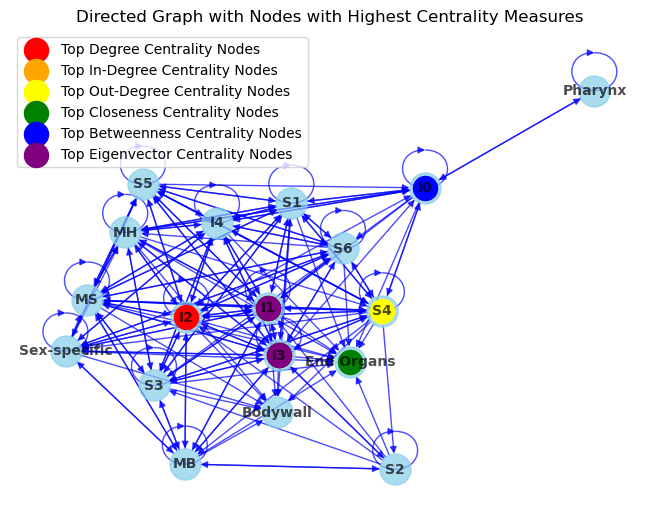

In [12]:
def get_nodes_with_highest_centrality(centrality_dict, top_n=5):
    sorted_nodes = sorted(centrality_dict, key=centrality_dict.get, reverse=True)
    return sorted_nodes[:top_n]

# Specify the number of top nodes to retrieve
top_n_nodes = 2

# Get nodes with highest centrality for each measure
top_degree_nodes = get_nodes_with_highest_centrality(degree_centrality, top_n=top_n_nodes)
top_in_degree_nodes = get_nodes_with_highest_centrality(in_degree_centrality, top_n=top_n_nodes)
top_out_degree_nodes = get_nodes_with_highest_centrality(out_degree_centrality, top_n=top_n_nodes)
top_closeness_nodes = get_nodes_with_highest_centrality(closeness_centrality, top_n=top_n_nodes)
top_betweenness_nodes = get_nodes_with_highest_centrality(betweenness_centrality, top_n=top_n_nodes)
top_eigenvector_nodes = get_nodes_with_highest_centrality(eigenvector_centrality, top_n=top_n_nodes)

# Print the nodes with highest centrality for each measure
print(f"Top {top_n_nodes} nodes with highest centrality measures:")
print(f"Degree Centrality: {top_degree_nodes}")
print(f"In-Degree Centrality: {top_in_degree_nodes}")
print(f"Out-Degree Centrality: {top_out_degree_nodes}")
print(f"Closeness Centrality: {top_closeness_nodes}")
print(f"Betweenness Centrality: {top_betweenness_nodes}")
print(f"Eigenvector Centrality: {top_eigenvector_nodes}")


# Visualize the network
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='blue', alpha=0.7)

# Highlight nodes with highest centrality measures
nx.draw_networkx_nodes(G, pos, nodelist=top_degree_nodes, node_color='red', label='Top Degree Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_in_degree_nodes, node_color='orange', label='Top In-Degree Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_out_degree_nodes, node_color='yellow', label='Top Out-Degree Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_closeness_nodes, node_color='green', label='Top Closeness Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_betweenness_nodes, node_color='blue', label='Top Betweenness Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_eigenvector_nodes, node_color='purple', label='Top Eigenvector Centrality Nodes')


plt.legend()
plt.title("Directed Graph with Nodes with Highest Centrality Measures")
plt.show()